In [1]:
from tensorflow import keras 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# dataset: Airline Passenger Satisfaction
# data from :https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

# dataset: Vegetable Image
# https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

# dataset: Emotion prediction from text
# https://www.kaggle.com/code/piamemrulhasan/emotion-prediction-from-text/data

### Get data

In [8]:
train = pd.read_csv('C:/Users/alink/Downloads/train/train.csv')
test = pd.read_csv('C:/Users/alink/Downloads/test/test.csv')
data = pd.concat([train, test], axis=0)

In [9]:
data.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [10]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
data.shape

(129880, 25)

### Work with NANs

In [12]:
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [13]:
data['Arrival Delay in Minutes'].fillna(value = data['Arrival Delay in Minutes'].mean(), inplace = True)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [15]:
data.drop('id', axis=1, inplace = True)

### Data Categorization

In [16]:
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2}, inplace = True)


In [17]:
data.head()

Unnamed: 0  Gender  Customer Type  Age  Type of Travel  Class  \
0           0       0              1   13               0      1   
1           1       0              0   25               1      2   
2           2       1              1   26               1      2   
3           3       1              1   25               1      2   
4           4       0              1   61               1      2   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

In [18]:
def dropOutliers(df, columns, q=0.93):
    for i in columns:
        val = df[i].quantile(q)
        changedData = df[df[i] < val]
        df = changedData
    return df

In [19]:
dataWO_outliers = dropOutliers(data, ['Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes'], q=0.90)

In [20]:
from sklearn import preprocessing
normData = preprocessing.normalize(dataWO_outliers.drop('satisfaction', axis=1), axis=0)
normData

array([[6.02154440e-08, 0.00000000e+00, 0.00000000e+00, ...,
        9.23518525e-04, 6.08648364e-04, 2.61168537e-03],
       [1.20430888e-07, 4.56706715e-03, 3.64560687e-03, ...,
        4.61759263e-03, 0.00000000e+00, 0.00000000e+00],
       [1.80646332e-07, 4.56706715e-03, 3.64560687e-03, ...,
        1.84703705e-03, 6.69513200e-03, 3.91752806e-03],
       ...,
       [1.56397573e-03, 4.56706715e-03, 3.64560687e-03, ...,
        1.84703705e-03, 0.00000000e+00, 0.00000000e+00],
       [1.56403594e-03, 0.00000000e+00, 3.64560687e-03, ...,
        3.69407410e-03, 0.00000000e+00, 0.00000000e+00],
       [1.56409616e-03, 4.56706715e-03, 3.64560687e-03, ...,
        9.23518525e-04, 0.00000000e+00, 0.00000000e+00]])

In [21]:
normDF = pd.DataFrame(normData, columns=[dataWO_outliers.drop('satisfaction', axis=1).columns])
# normDF['satisfaction'] = dataWO_outliers[['satisfaction']]
normDF['satisfaction']=list(dataWO_outliers['satisfaction'])
normDF.drop(columns=['Unnamed: 0'], inplace=True)

C:\Users\alink\AppData\Local\Temp\ipykernel_2392\797605483.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  normDF.drop(columns=['Unnamed: 0'], inplace=True)


### Models

In [23]:
X = normDF.drop('satisfaction', axis=1)
y = dataWO_outliers['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

C:\Users\alink\AppData\Local\Temp\ipykernel_2392\2003727619.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = normDF.drop('satisfaction', axis=1)


In [24]:
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout

model = Sequential()
model.add(Dense(150, activation='relu', input_shape = (22,)))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))
          
          
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_split=0.33, epochs=80, batch_size=600)

scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/80


C:\Users\alink\anaconda3\envs\tensor\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


71/71 [==============================] - 2s 9ms/step - loss: 0.5481 - accuracy: 0.7618 - val_loss: 0.6863 - val_accuracy: 0.5877
Epoch 2/80
71/71 [==============================] - 0s 6ms/step - loss: 0.3885 - accuracy: 0.8476 - val_loss: 0.7076 - val_accuracy: 0.5877
Epoch 3/80
71/71 [==============================] - 0s 6ms/step - loss: 0.3405 - accuracy: 0.8638 - val_loss: 0.7533 - val_accuracy: 0.5877
Epoch 4/80
71/71 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.8778 - val_loss: 0.7617 - val_accuracy: 0.5877
Epoch 5/80
71/71 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 0.8864 - val_loss: 0.7832 - val_accuracy: 0.5877
Epoch 6/80
71/71 [==============================] - 0s 5ms/step - loss: 0.2647 - accuracy: 0.8926 - val_loss: 0.7163 - val_accuracy: 0.5877
Epoch 7/80
71/71 [==============================] - 0s 5ms/step - loss: 0.2531 - accuracy: 0.8960 - val_loss: 0.6004 - val_accuracy: 0.6120
Epoch 8/80
71/71 [=============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


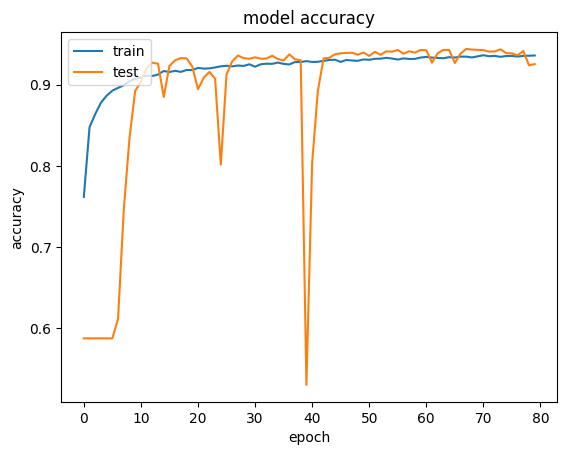

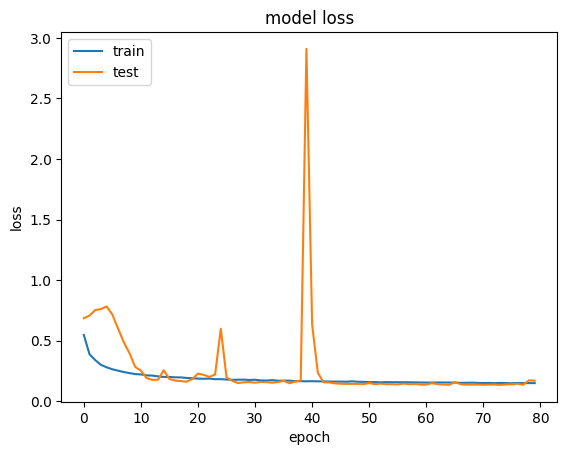

In [25]:
import matplotlib.pyplot as plt
print(r.history.keys())

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2

In [253]:
import numpy as np
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow 
from tensorflow import keras 
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout


In [329]:
trainpath = r'C:\Users\alink\train\train'
testpath = r'C:\Users\alink\test\test'
for folder in  os.listdir(trainpath) :
    print(folder)

Broccoli
Carrot
Pumpkin


In [330]:
def assign_label(img,flower_type):
    return flower_type

In [331]:
import numpy as np
import os
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


def read_and_save(root_folder):
    imgs = []
    folders = []
    for folder in os.listdir(root_folder):
        for img_path in os.listdir(os.path.join(root_folder, folder)):
            img = Image.open(os.path.join(root_folder, folder, img_path))
            img = np.array(img)
            imgs.append(img)
            folders.append(folder)
    folders_dict = {key: i for i, key in enumerate(np.unique(folders))}
    labels = [folders_dict[folders[i]] for i in range(len(folders))]
    labelsUpd = [folders[i] for i in range(len(folders))]
    label_vectors = keras.utils.to_categorical(labels, 3)
    return np.array(imgs), np.array(label_vectors), np.array(labelsUpd)


Xtrain, Ytrain, tr = read_and_save(trainpath)
Xtrain, Ytrain, tr = shuffle(Xtrain, Ytrain, tr)
Xtest, Ytest, ts = read_and_save(testpath)
Xtest, Ytest, ts = shuffle(Xtest, Ytest, ts)

In [334]:
Xtrain = Xtrain.astype('float32')/255
Xtest = Xtest.astype('float32')/255

In [335]:
input_shape= Xtrain.shape[1:]
input_shape

(224, 224, 3)

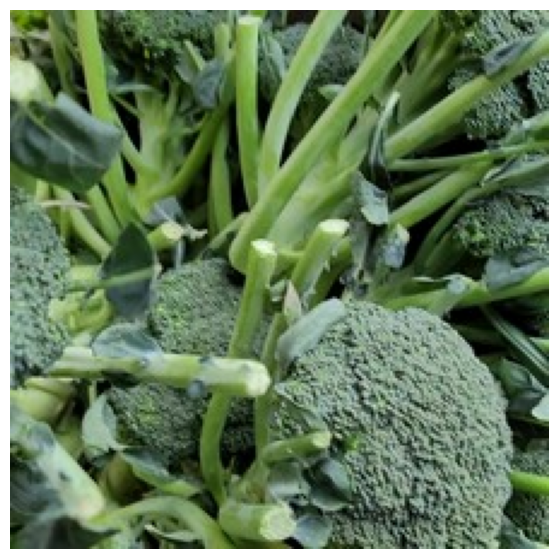

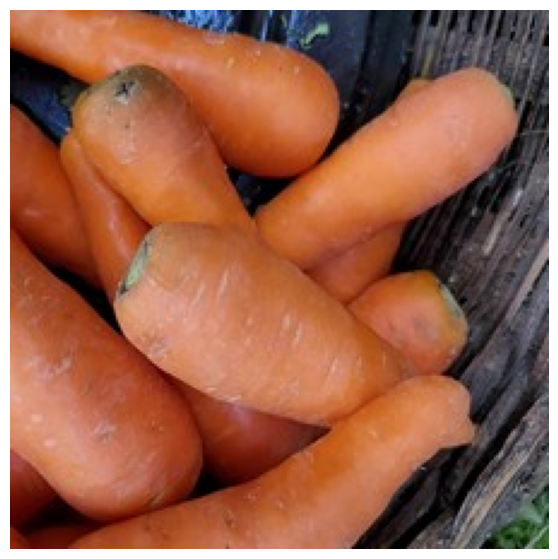

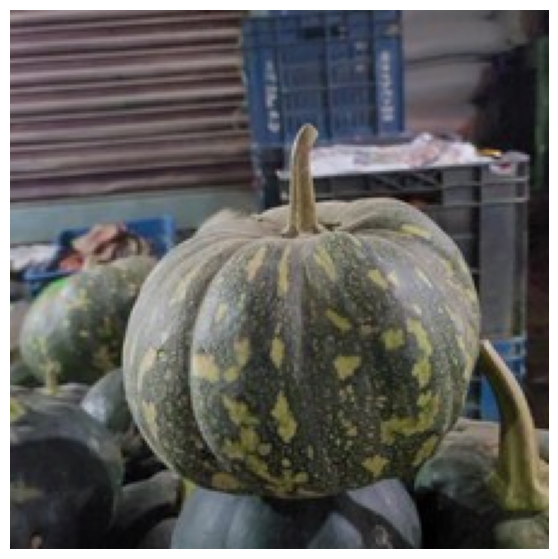

In [261]:
example = [Xtrain[np.where(Ytrain.T[i] == 1)][0] for i in range(3)]

for i in range(3):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    example[i] *= 255
    example[i] = example[i].astype('uint8')
    plt.imshow(example[i])
    plt.show()


In [262]:
from tensorflow.keras import layers

model =  keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                        input_shape=input_shape, strides=1, padding='same'))
# model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))
# 


model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',  strides=1, padding='same'))
# model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))


model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
# model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.5))


# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.5))


model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


In [263]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout_12 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 56, 56, 64)      

In [264]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)
History  = model.fit(Xtrain, Ytrain,
                      epochs=100, validation_split=0.2,
                    callbacks=early_stopping, verbose=1)

Epoch 1/100
62/62 [==============================] - 90s 1s/step - loss: 0.6627 - accuracy: 0.7180 - val_loss: 0.2540 - val_accuracy: 0.9024
Epoch 2/100
62/62 [==============================] - 72s 1s/step - loss: 0.2320 - accuracy: 0.9075 - val_loss: 0.2265 - val_accuracy: 0.9126
Epoch 3/100
62/62 [==============================] - 71s 1s/step - loss: 0.1793 - accuracy: 0.9324 - val_loss: 0.1593 - val_accuracy: 0.9411
Epoch 4/100
62/62 [==============================] - 70s 1s/step - loss: 0.1339 - accuracy: 0.9548 - val_loss: 0.4274 - val_accuracy: 0.7988
Epoch 5/100
62/62 [==============================] - 71s 1s/step - loss: 0.1450 - accuracy: 0.9487 - val_loss: 0.1231 - val_accuracy: 0.9512
Epoch 6/100
62/62 [==============================] - 71s 1s/step - loss: 0.0932 - accuracy: 0.9675 - val_loss: 0.1639 - val_accuracy: 0.9187
Epoch 7/100
62/62 [==============================] - 71s 1s/step - loss: 0.0955 - accuracy: 0.9670 - val_loss: 0.0740 - val_accuracy: 0.9797
Epoch 8/100
6

In [265]:
score = model.evaluate(Xtest, Ytest, verbose=0) 
print('Test accuracy:', score[1])


Test accuracy: 0.9900000095367432


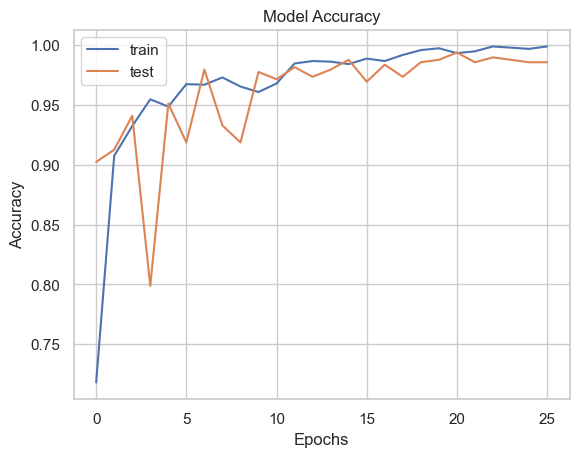

In [266]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [344]:
pred=model.predict(Xtest)
pred_digits=np.argmax(pred,axis=1)

19/19 [==============================] - 3s 154ms/step


In [345]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Ytest)):
    if(np.argmax(Ytest[i])==pred_digits[i]):
        prop_class.append(i)


i=0
for i in range(len(Ytest)):
    if(not np.argmax(Ytest[i])==pred_digits[i]):
        mis_class.append(i)


In [346]:
len(prop_class)


594

In [347]:
len(mis_class)


6

In [348]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Y=le.fit_transform(tr)

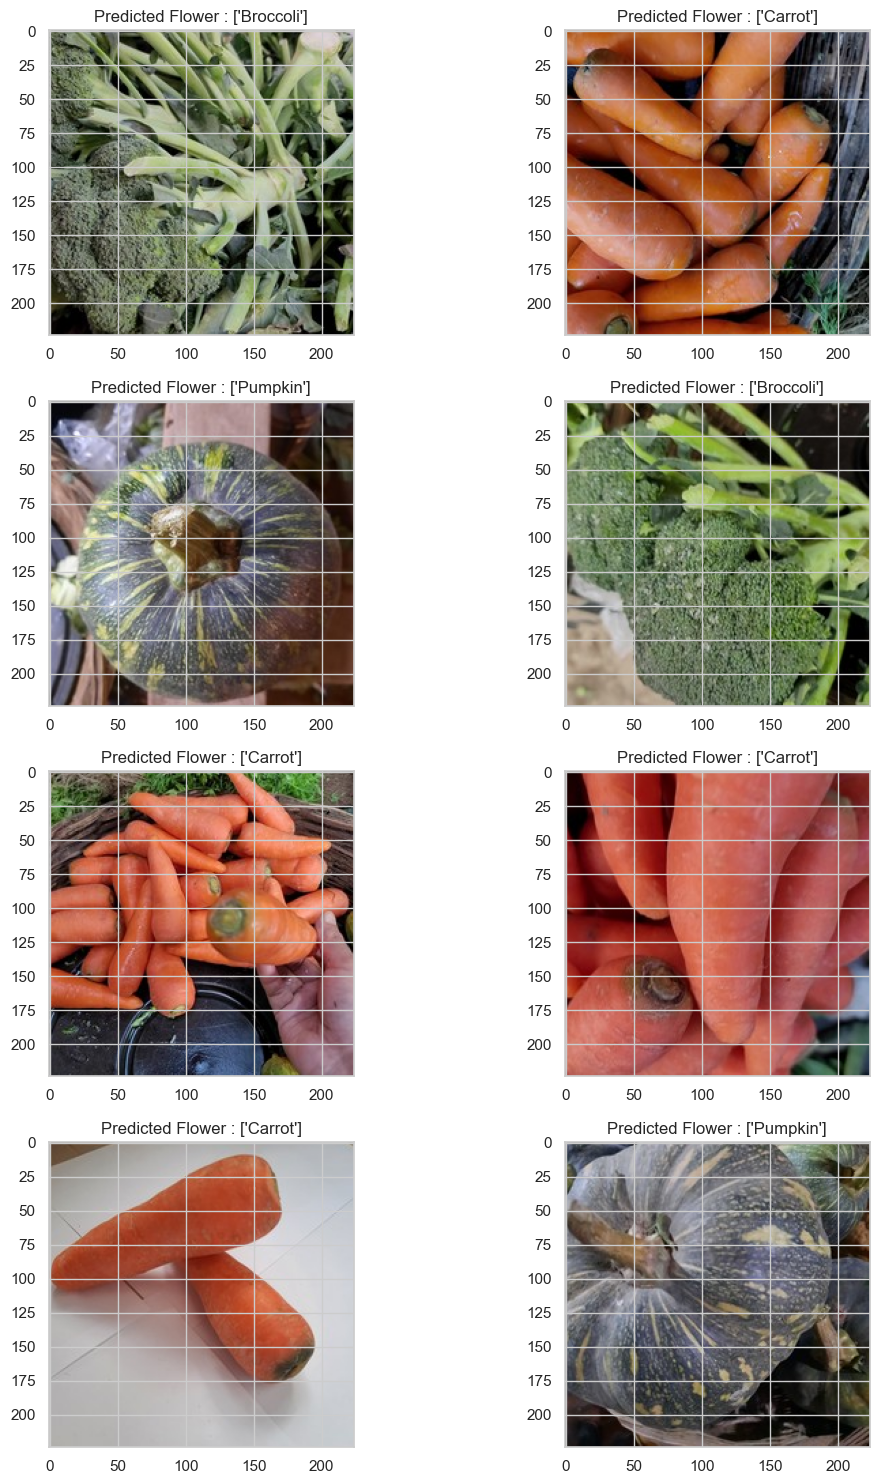

In [349]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig,ax = plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (2):
        ax[i,j].imshow(Xtest[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1

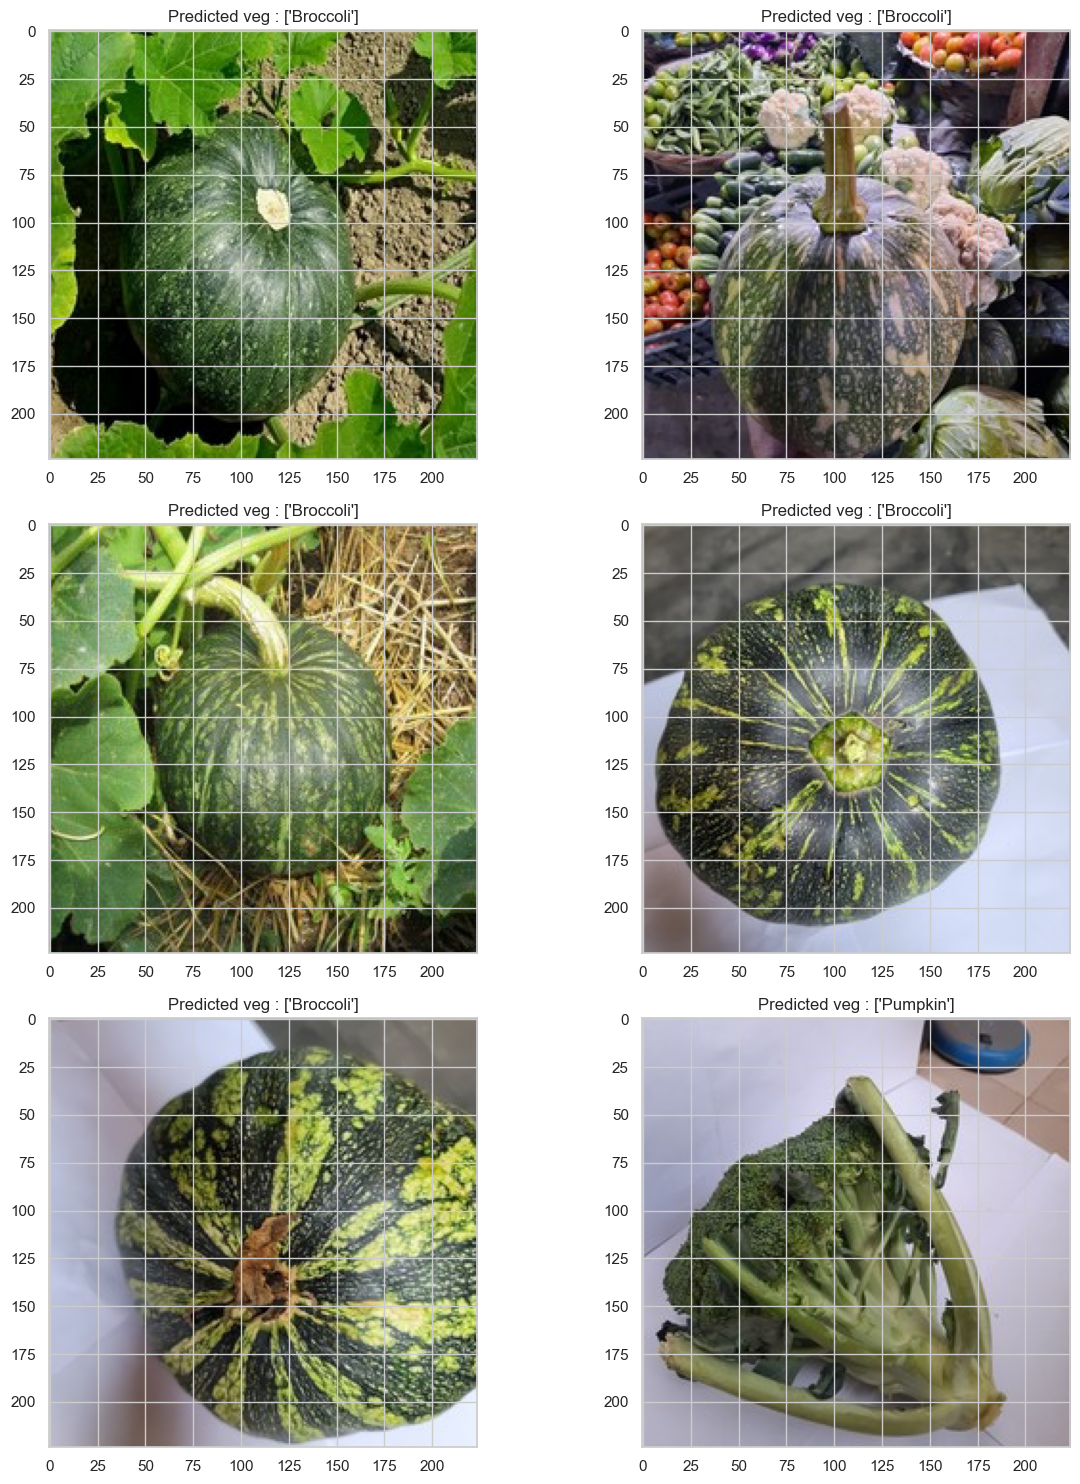

In [350]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        ax[i,j].imshow(Xtest[mis_class[count]])
        ax[i,j].set_title("Predicted veg : "+str(le.inverse_transform([pred_digits[mis_class[count]]])))
        plt.tight_layout()
        count+=1

### 3


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd 

data = pd.read_csv('Emotion_final.csv')
dataUpd = data[(data['Emotion'] == 'sadness') | (data['Emotion'] == 'love') | (data['Emotion'] == 'happy')]

In [43]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('English')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alink\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [240]:
import string 
dataUpd['Text'] = dataUpd['Text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
dataUpd['Text'] = dataUpd['Text'].str.replace('[{}]'.format(string.punctuation), '')
dataUpd['class'] = dataUpd['Emotion'] 
dataUpd['class'].replace({'sadness':0, 'love':1, 'happy': 2}, inplace=True)
allX = dataUpd['Text'].values
allY = dataUpd['class'].values

Xtrain, Xtest, Ytrain, Ytest = train_test_split(allX, allY, test_size=0.2)

In [241]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
input_length = 90

In [242]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(Xtrain)

In [243]:
Xtrain = pad_sequences(tokenizer.texts_to_sequences(Xtrain), input_length)
Xtest = pad_sequences(tokenizer.texts_to_sequences(Xtest), input_length)

In [244]:
import numpy as np
Ytrain = np.asarray(Ytrain).astype('float32').reshape((-1,1))

In [245]:
from keras.utils import to_categorical
Ytrain=to_categorical(Ytrain)

In [250]:
from keras.layers import LSTM, Activation, Bidirectional, Dense, Dropout, Input, Embedding
from keras.models import Model
from keras.optimizers import RMSprop
def RNN():
    model = keras.Sequential()
    model.add(layers.Embedding(10000, 128, input_length=90))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(100,return_sequences=True)))    
    model.add(Bidirectional(LSTM(128,return_sequences=True)))    
    model.add(layers.LSTM(256))
    model.add(layers.Dense(3, activation='softmax'))
    return model
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 90, 128)           1280000   
                                                                 
 dropout_11 (Dropout)        (None, 90, 128)           0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 90, 200)          183200    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 90, 256)          336896    
 nal)                                                            
                                                                 
 lstm_38 (LSTM)              (None, 256)               525312    
                                                                 
 dense_18 (Dense)            (None, 3)               

In [251]:
from keras.callbacks import EarlyStopping

model.fit(Xtrain,Ytrain,batch_size=128,epochs=10,
          validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 63s 717ms/step - loss: 0.8089 - accuracy: 0.6197 - val_loss: 0.4640 - val_accuracy: 0.8255
Epoch 2/10
75/75 [==============================] - 51s 673ms/step - loss: 0.2893 - accuracy: 0.8943 - val_loss: 0.2634 - val_accuracy: 0.9063
Epoch 3/10
75/75 [==============================] - 55s 731ms/step - loss: 0.1083 - accuracy: 0.9617 - val_loss: 0.2511 - val_accuracy: 0.9117
Epoch 4/10
75/75 [==============================] - 55s 731ms/step - loss: 0.0650 - accuracy: 0.9781 - val_loss: 0.2946 - val_accuracy: 0.9130
Epoch 5/10
75/75 [==============================] - 60s 802ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.2770 - val_accuracy: 0.9109
Epoch 6/10
75/75 [==============================] - 55s 729ms/step - loss: 0.0413 - accuracy: 0.9862 - val_loss: 0.3347 - val_accuracy: 0.9100
Epoch 7/10
75/75 [==============================] - 55s 727ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.3272 - val_accuracy: 0.9109